## --------------------------------------------------------------------------------------------------------------------------------------
# KELOMPOK 5 A2
## ----------------------------------------------  
## ANGGOTA KELOMPOK :
### Natalie Fuad                       : 2109106040 (KETUA KELOMPOK)
### Agustina Dwi Maharani     : 2109106037
### Sherina Laraswati              : 21091050
## --------------------------------------------------------------------------------------------------------------------------------------

## SPLIT DATA

In [99]:
import splitfolders 

In [103]:
splitfolders.ratio('flowers/', output="dataset-output", seed=42, ratio=(0.7,0.25,0.05), group_prefix=None)

Copying files: 2119 files [00:01, 1502.91 files/s]


## IMPORT LIBRARY

In [104]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

## DATA COLLECTING

In [155]:
data_train = image_dataset_from_directory('dataset-output/train',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (150,150),
    batch_size = 64,
    class_names = ['daisy', 'dandelion', 'sunflower'],
    shuffle = True,
    seed = 47
)

data_val = image_dataset_from_directory('dataset-output/val',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['daisy', 'dandelion', 'sunflower'],
    image_size = (150,150),
    batch_size = 64,
    shuffle = True,
    seed = 47
)

data_test = image_dataset_from_directory('dataset-output/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = ['daisy', 'dandelion', 'sunflower'],
    image_size = (150,150),
    batch_size = 128,
    shuffle = True,
    seed = 47
)

Found 1482 files belonging to 3 classes.
Found 529 files belonging to 3 classes.
Found 108 files belonging to 3 classes.


## DATA PREPROCESSING

### VISUALISASI DATA

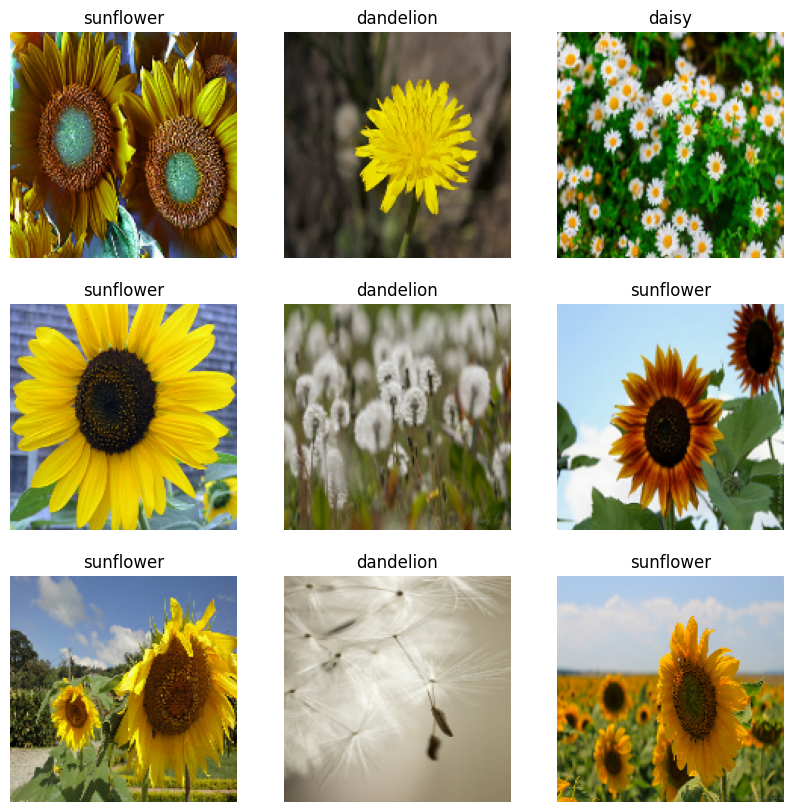

In [156]:
class_names = data_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

In [157]:
class_names = data_train.class_names

### AUGMENTASI

In [158]:
def hue(x, y):
    image = tf.image.random_hue(x, 0.2)
    return image, y

In [159]:
def saturation(x,y):
    image = tf.image.random_saturation(x, 5, 10)
    return image, y

In [160]:
def brightness(x,y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y

In [161]:
data_train = data_train.map(hue).map(saturation).map(brightness)

## Normalisasi

In [162]:
img_size = 180

rezise_rescale = tf.keras.Sequential([
    layers.Resizing(img_size, img_size),
    layers.Rescaling(1./255)]
    )

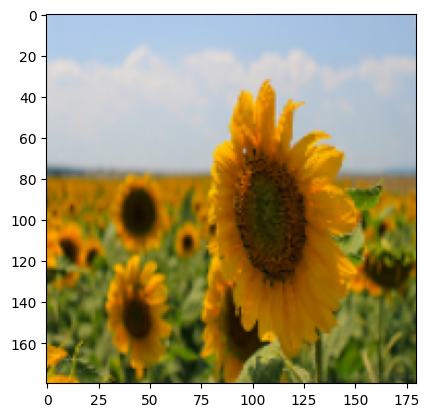

In [163]:
result = rezise_rescale(images)
plt.imshow(result[i].numpy())

## VISUALISASI DATA SETELAH AUGMENTASI

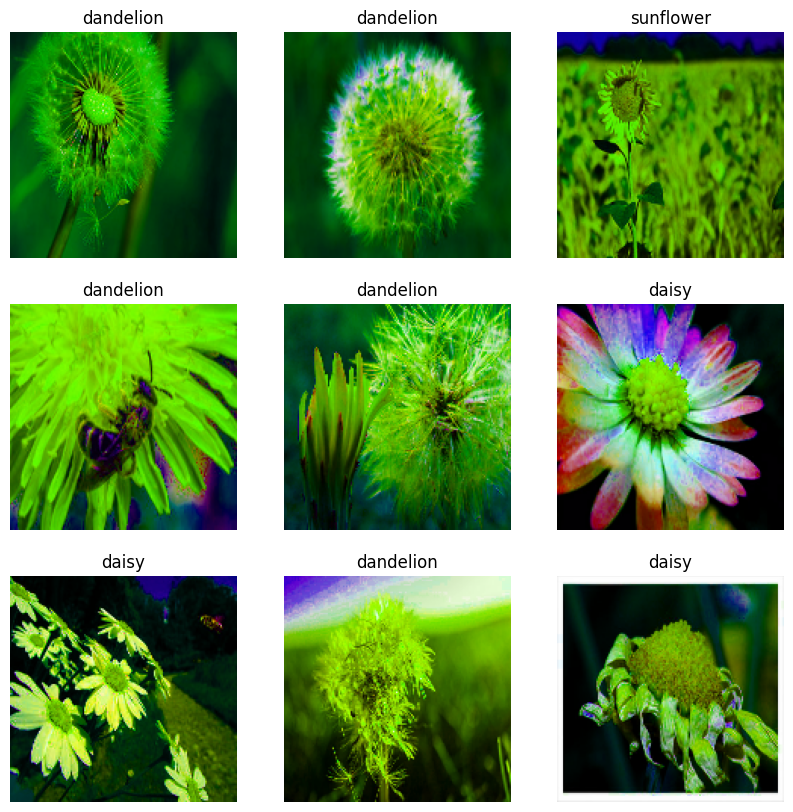

In [164]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")

## DATA ANALYSIS AND VISUALIZATION

### META DATA

In [165]:
print("--------- META DATA ---------\n")
print(data_train, "\n")

print("Class Name  : ", class_names)

for images, labels in data_train.take(1):
    print("image shape : ",images.numpy()[0].shape)
    print("label shape : ",labels.numpy().shape)
    break

--------- META DATA ---------

<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))> 

Class Name  :  ['daisy', 'dandelion', 'sunflower']
image shape :  (150, 150, 3)
label shape :  (64, 3)


## DATA MODELING

In [166]:
model = Sequential()

#input layer
model.add(Conv2D(256,(3,3),activation='relu',input_shape=[150,150,3]))

# Hidden Layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
                
# Output Layer
model.add(Dense(3,activation='softmax'))

In [167]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 256)     7168      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 74, 74, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 256)       590080    
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 36, 36, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 64)        147520    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 17, 17, 64)     

In [168]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [170]:
hasil = model.fit(data_train, epochs = 30, validation_data=data_val)

Epoch 1/30
24/24 [==============================] - 293s 12s/step - loss: 0.3197 - accuracy: 0.8657 - val_loss: 1.9835 - val_accuracy: 0.5482
Epoch 2/30
24/24 [==============================] - 294s 12s/step - loss: 0.2687 - accuracy: 0.8941 - val_loss: 2.2828 - val_accuracy: 0.5350
Epoch 3/30
24/24 [==============================] - 376s 16s/step - loss: 0.3082 - accuracy: 0.8846 - val_loss: 2.1206 - val_accuracy: 0.5331
Epoch 4/30
24/24 [==============================] - ETA: 0s - loss: 0.3239 - accuracy: 0.8765 

## EVALUASI

In [ ]:
evaluasi = model.evaluate(data_train, data_val, verbose=0)
print(f'Loss Validation-Set    : {evaluasi[0]}')
print(f'Akurasi Validation-Set : {evaluasi[1]}')

In [ ]:
epochs = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(15,5))

#subplot akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epochs, y=hasil.history['accuracy'], label='Akurasi Training')
sns.lineplot(x=epochs, y=hasil.history['val_accuracy'], label='Validation Training')

plt.xticks(epochs)
plt.ylabel('Akurasi (%)')
plt.xlabel('N_Epochs')
plt.title('Train Vs. Validation Accuracy')

#subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epochs, y=hasil.history['loss'], label='Akurasi Training')
sns.lineplot(x=epochs, y=hasil.history['val_loss'], label='Validation Training')

plt.xticks(epochs)
plt.ylabel('Loss (%)')
plt.xlabel('N_Epochs')
plt.title('Train Vs. Validation Loss')

plt.show()